## Problema 4 - Correlación no es causalidad, pero tampoco casualidad

#### Marc Nebot Moyano

#### Librerías necesarias

In [1]:
from apafib import load_BCN_vuelos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import plotly.express as px
from yellowbrick.regressor import residuals_plot
from sklearn import set_config
import warnings
from yellowbrick.regressor import AlphaSelection

set_config(display='text')
warnings.filterwarnings('ignore')

sns.set()
pd.set_option('display.precision', 3)

#### a)

##### Visualización de los datos

Primeramente, cargaremos el dataset y observaremos qué datos tenemos

In [2]:
life_BCN_data = load_BCN_vuelos()
life_BCN_data

,Carn / Pollastre,Carn / Porcí,Fruites i hortalisses / Ceba,Fruites i hortalisses / Patata,Fruites i hortalisses / Plàtan,Fruites i hortalisses / Poma,Fruites i hortalisses / Taronja,Peix i marisc / Llenguado,Peix i marisc / Llobarro,Peix i marisc / Lluç,Peix i marisc / Orada,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa
0,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,4.2,64.0
1,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,4.2,87.0
2,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,4.2,134.0
3,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,4.2,114.0
4,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,4.2,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.23,1.02,0.25,0.48,1.7,0.75,0.80,15.0,5.8,5.0,4.8,439.0
361,1.23,1.02,0.25,0.48,1.7,0.70,0.75,15.0,5.8,5.0,4.8,368.0
362,1.23,1.02,0.25,0.48,1.7,0.70,0.75,15.0,5.5,4.8,4.5,399.0
363,1.23,1.02,0.25,0.48,1.6,0.80,0.80,15.0,5.5,4.8,4.5,436.0


Vamos a observar cuántos datos tenemos

In [3]:
life_BCN_data.shape

(365, 12)

Comprobaremos que no haya valores incorrectos y visualizaremos el tamaño de los valores de nuestros datos

In [4]:
life_BCN_data.describe()

,Carn / Pollastre,Carn / Porcí,Fruites i hortalisses / Ceba,Fruites i hortalisses / Patata,Fruites i hortalisses / Plàtan,Fruites i hortalisses / Poma,Fruites i hortalisses / Taronja,Peix i marisc / Llenguado,Peix i marisc / Llobarro,Peix i marisc / Lluç,Peix i marisc / Orada,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa
count,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000,365.000
mean,1.073,1.254,0.318,0.409,1.385,0.951,0.965,13.772,5.054,4.302,4.378,223.775
std,0.127,0.183,0.106,0.059,0.307,0.217,0.207,2.111,0.354,1.080,0.215,135.202
min,0.850,1.020,0.240,0.340,0.900,0.700,0.600,8.500,4.500,1.800,4.000,28.000
25%,0.960,1.100,0.250,0.350,1.200,0.800,0.800,12.800,4.800,3.500,4.250,78.000
50%,1.110,1.230,0.300,0.400,1.250,0.900,0.900,13.900,5.000,4.000,4.400,243.000
75%,1.180,1.460,0.320,0.450,1.700,1.000,1.100,15.000,5.400,5.000,4.500,350.000
max,1.240,1.550,1.000,0.650,2.000,1.600,1.750,19.000,5.950,7.500,5.100,445.000


Vamos a cambiar el nombre a nuestras columnas, pues estos son muy largos y podría perjudicar nuestra visualización

In [5]:
life_BCN_data.columns = ['Pollastre', 'Porc', 'Ceba', 'Patata', 'Plàtan', 'Poma', 'Taronja', 'Llenguado', 'Llobarro', 'Lluç', 'Orada', 'Operacions']
life_BCN_data.head()

,Pollastre,Porc,Ceba,Patata,Plàtan,Poma,Taronja,Llenguado,Llobarro,Lluç,Orada,Operacions
0,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,64.0
1,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,87.0
2,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,134.0
3,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,114.0
4,0.85,1.1,0.3,0.4,1.0,0.8,1.0,13.0,5.0,6.0,4.2,81.0


Podemos observar que no tenemos NAs

In [6]:
life_BCN_data.isna().sum().sort_values(ascending=False)

Pollastre     0
Porc          0
Ceba          0
Patata        0
Plàtan        0
Poma          0
Taronja       0
Llenguado     0
Llobarro      0
Lluç          0
Orada         0
Operacions    0
dtype: int64

Vamos a hacer la partición de nuestros datos

In [7]:
X = life_BCN_data.loc[:,life_BCN_data.columns != "Operacions"]
y = life_BCN_data["Operacions"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

train = X_train.copy()
train['Operacions'] = y_train
train

,Pollastre,Porc,Ceba,Patata,Plàtan,Poma,Taronja,Llenguado,Llobarro,Lluç,Orada,Operacions
239,0.87,1.24,0.27,0.35,1.4,0.85,0.80,13.8,5.0,3.0,4.50,392.0
187,1.11,1.46,0.32,0.50,1.4,1.00,1.20,15.8,4.8,4.5,4.40,285.0
95,1.24,1.46,0.50,0.48,1.2,1.20,1.30,10.8,4.8,2.8,4.30,78.0
165,1.11,1.53,0.28,0.35,1.4,0.90,1.25,13.9,4.9,4.8,4.50,142.0
230,0.87,1.26,0.27,0.38,1.5,0.90,0.75,16.8,5.0,4.5,4.45,348.0
...,...,...,...,...,...,...,...,...,...,...,...,...
282,0.95,1.11,0.27,0.37,1.2,0.70,1.00,13.0,5.8,3.8,4.40,398.0
89,1.24,1.46,0.30,0.36,1.2,1.20,0.85,10.8,4.8,2.4,4.10,80.0
243,0.87,1.23,0.27,0.35,1.3,0.85,0.85,14.5,5.0,3.5,4.50,386.0
321,1.20,1.02,0.25,0.48,2.0,0.75,0.60,14.5,5.5,6.0,4.40,328.0


Vamos a observar las relaciones de nuestra variable objetivo con las demás

<AxesSubplot: xlabel='Llobarro', ylabel='Operacions'>

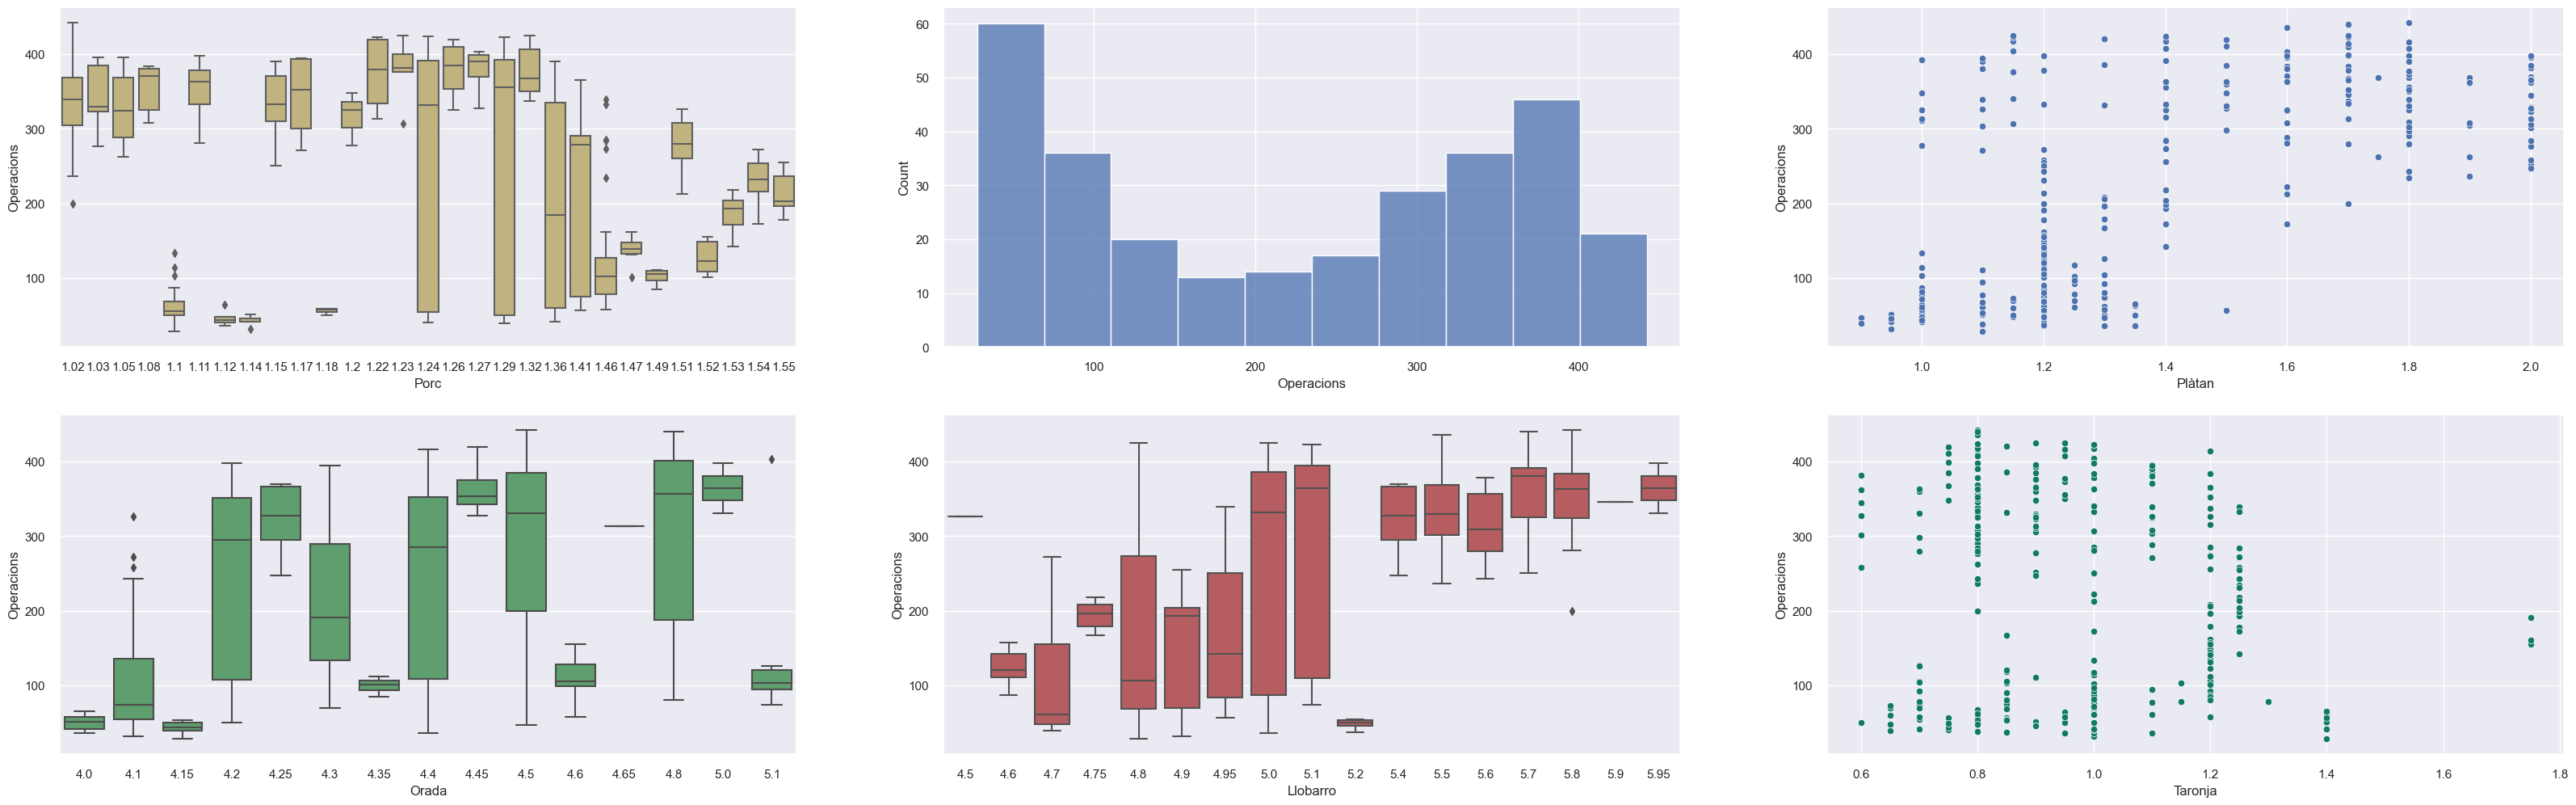

In [8]:
fig, ax = plt.subplots(2,3,figsize=(40,12))
sns.boxplot(data = train, x='Porc', y='Operacions',ax=ax[0,0], color="y")
sns.histplot(data = train, x='Operacions',ax=ax[0,1])
sns.scatterplot(data = train, x='Plàtan', y='Operacions',ax=ax[0,2], color="b")
sns.scatterplot(data = train, x='Taronja', y='Operacions',ax=ax[1,2], color="#117A65")
sns.boxplot(data = train, y='Operacions', x='Orada', ax=ax[1,0], color="g")
sns.boxplot(data = train, y='Operacions', x='Llobarro', ax=ax[1,1], color="r")

Seguidamente podemos observar las correlaciones con nuestra variable objetivo. Vemos que tenemos ciertas variables con una correlación alta respecto a nuestra variable objetivo que podrían ayudarnos a realizar mejores predicciones

<AxesSubplot: >

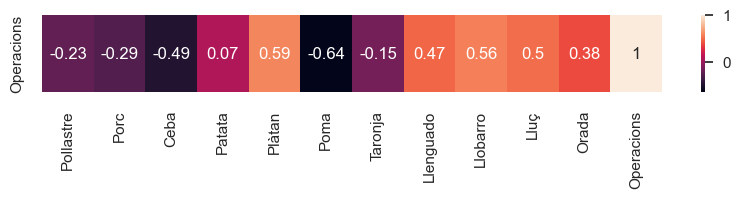

In [9]:
correlation_matrix = life_BCN_data.corr().round(2) # arrodonir a 2 decimals
plt.figure(figsize = (10,1))
sns.heatmap(data = correlation_matrix.T.loc[['Operacions'],:], annot = True)

Seguidamente procederemos a aplicar el scaler a los datos y a tratar aquellos valores incorrectos

In [10]:
def scaling_preprocessing(X, y, scaler=None):
    # Escalamos las variables numericas
    numerical_columns = [c for c in X.columns]
    if scaler is None: 
        # Generamos el scaler cuando los datos son los de entrenamiento
        scaler = StandardScaler()
        X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
    else: 
        X[numerical_columns] = scaler.transform(X[numerical_columns])
    # Eliminamos los valores perdidos
    X=X.dropna()
    y=y[X.index]
    return X, y, scaler

Podemos observar cómo han quedado nuestros valores

In [11]:
X_train_std, y_train_std, scaler = scaling_preprocessing(X_train,y_train)
X_train_std

,Pollastre,Porc,Ceba,Patata,Plàtan,Poma,Taronja,Llenguado,Llobarro,Lluç,Orada
239,-1.641,-1.079e-01,-0.448,-1.030,-5.525e-04,-0.468,-0.781,-0.011,-0.124,-1.198,0.552
187,0.252,1.075e+00,0.022,1.613,-5.525e-04,0.221,1.103,0.938,-0.700,0.150,0.084
95,1.278,1.075e+00,1.712,1.261,-6.459e-01,1.141,1.574,-1.435,-0.700,-1.378,-0.383
165,0.252,1.452e+00,-0.354,-1.030,-5.525e-04,-0.239,1.339,0.036,-0.412,0.420,0.552
230,-1.641,-3.684e-04,-0.448,-0.502,3.221e-01,-0.239,-1.016,1.413,-0.124,0.150,0.318
...,...,...,...,...,...,...,...,...,...,...,...
282,-1.010,-8.072e-01,-0.448,-0.678,-6.459e-01,-1.158,0.161,-0.391,2.181,-0.479,0.084
89,1.278,1.075e+00,-0.166,-0.854,-6.459e-01,1.141,-0.545,-1.435,-0.700,-1.738,-1.319
243,-1.641,-1.617e-01,-0.448,-1.030,-3.232e-01,-0.468,-0.545,0.321,-0.124,-0.749,0.552
321,0.963,-1.291e+00,-0.635,1.261,1.935e+00,-0.928,-1.723,0.321,1.317,1.498,0.084


In [12]:
X_test_std, y_test_std, _ = scaling_preprocessing(X_test,y_test,scaler)

#### b)

Vamos a realizar el análisis de componentes principales de nuestra muestra para obtener aquellos aspectos relevantes que nos ayuden a hacer nuestras predicciones correctamente

[0.34163002 0.166672   0.12264517 0.10343081 0.06949076 0.05654807
 0.04508652 0.04256693 0.02447449 0.01521258 0.01224264]
[0.34163002 0.50830202 0.63094719 0.73437801 0.80386877 0.86041684
 0.90550336 0.94807029 0.97254478 0.98775736 1.        ]


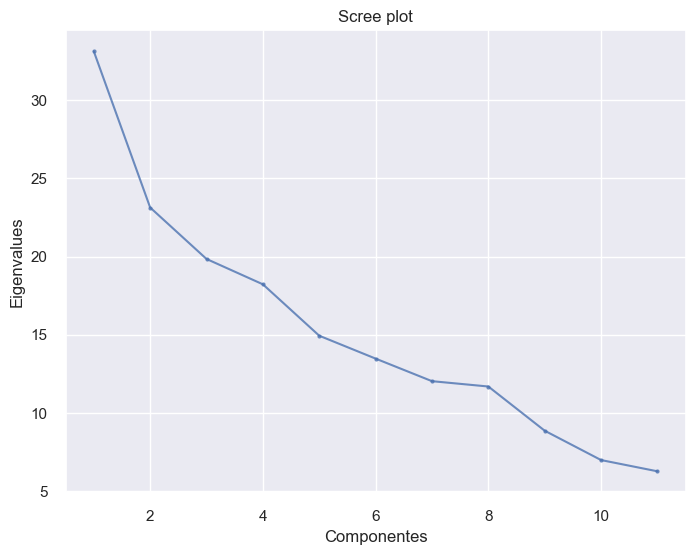

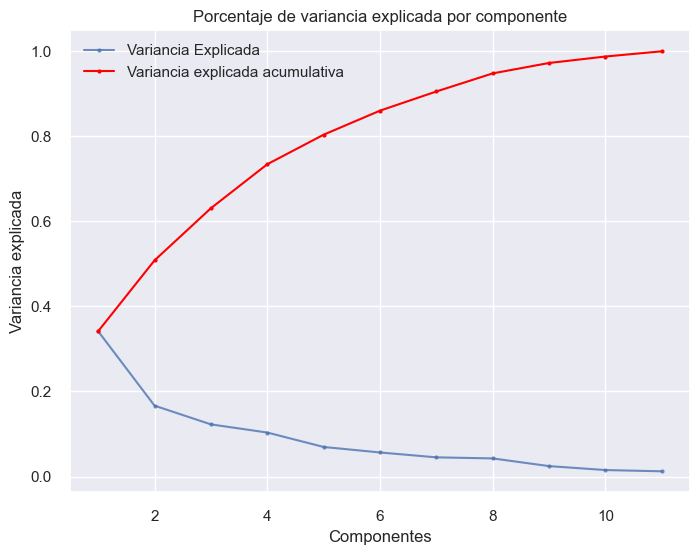

In [13]:
myPCA = PCA().fit(X_train_std);

print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

Vamos a observar qué tan importante ha sido cada variable en nuestros componentes

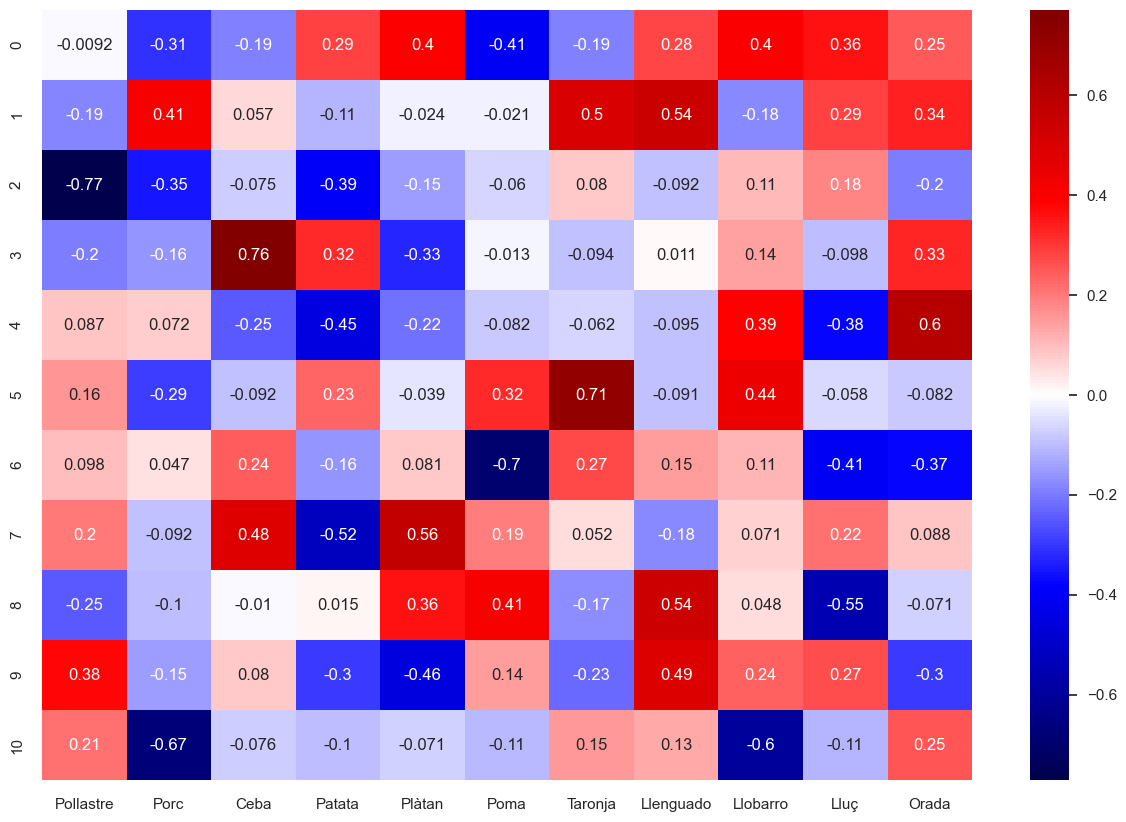

In [14]:
fig = plt.figure(figsize=(15,10));
sns.heatmap(myPCA.components_, cmap='seismic', 
            xticklabels=list(X_train_std),
            vmin=-np.max(np.abs(myPCA.components_)),
            vmax=np.max(np.abs(myPCA.components_)),
            annot=True);

Hemos podido observar claras relaciones entre la variable objetivo y nuestras demás variable. Esto lo hemos podido observar en la visualización de datos y confirmar haciendo el PCA, observando la asignación de los pesos de cada variable y obteniendo así la importancia de estas.

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

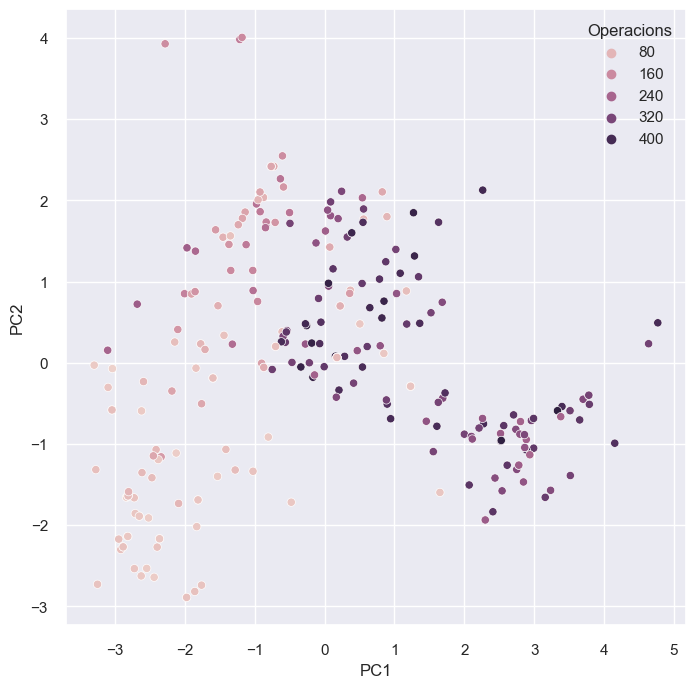

In [15]:
myPCA = PCA().fit(X_train_std);
X_transformed = X_train_std.copy()
transformed_df = myPCA.transform(X_transformed)
X_transformed[['PC1','PC2', 'PC3', 'PC4']] = transformed_df[:,:4]
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='PC1', y='PC2', hue=y_train_std, data=X_transformed)

#### c)

Seguidamente aplicaremos una regresión lineal y posteriormente analizaremos los resultados usando validación cruzada con scoring r2

In [16]:
lr = LinearRegression()
lr.fit(X_train_std,y_train_std)
y_pred = lr.predict(X_test_std)

lr_r2 = np.mean(cross_val_score(lr, X_test_std,y_test_std, cv=5, scoring='r2'))

Podemos observar por encima las predicciones de nuestro modelo que valoraremos posteriormente

In [17]:
predictions = pd.DataFrame({'y_pred':y_pred, 'y_test':y_test_std})
predictions

,y_pred,y_test
294,372.030,376.0
278,345.783,294.0
340,294.225,265.0
29,86.314,43.0
49,46.687,56.0
...,...,...
191,205.800,315.0
87,105.897,98.0
9,184.100,126.0
27,120.224,61.0


Así nos quedaría nuestro muestreo observando buenos resultados debidos a ese 0.74 y 0.71 de nuestro score, aunque obviamente si llegase a 0.8 sería mejor

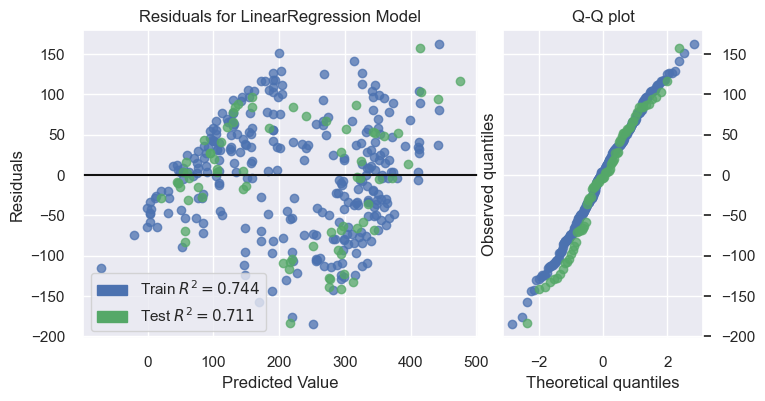

In [18]:
plt.figure(figsize=(8,4));
viz = residuals_plot(lr, X_train_std, y_train_std, X_test_std, y_test_std, is_fitted=True, qqplot=True, hist=False);

Seguidamente procederemos a aplicar LASSO que después compararemos con LR, aunque debemos saber que LASSO es una variante penalizadora de LR y dependiendo del problema, este puede dar resultados muy similares si la penalización es baja

In [19]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

lasso_cv =LassoCV(alphas=lambdas,cv=5).fit(X_train_std,y_train_std)

lasso_r2 =  np.mean(cross_val_score(lasso_cv, X_test_std,y_test_std, cv=5))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

Best lambda: 0.5 R2 score: 0.5714111690393227


Podemos observar la selección de alpha de LASSO

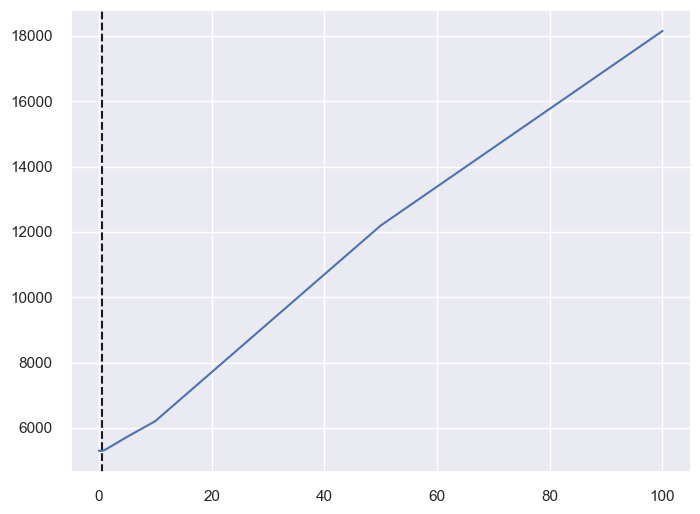

In [20]:
plt.figure(figsize=(8,6))
vis = AlphaSelection(LassoCV(alphas=lambdas));
vis.fit(X_train, y_train);

Observamos una clara similitud entre LASSO y LR, esto es debido a lo que explicado anteriormente y al seleccionar alpha 0.5 nos damos cuenta que realmente estamos aplicando algo muy similar a LR

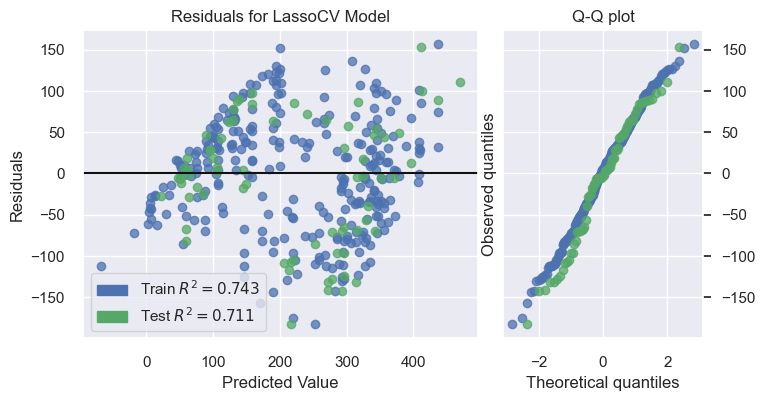

In [21]:
plt.figure(figsize=(8,4));
viz = residuals_plot(lasso_cv, X_train_std, y_train_std, X_test_std, y_test_std, is_fitted=True, qqplot=True, hist=False);

Aquí podemos observar la tabla comparativa de lasso y lr, vemos claramente que son muy similares aunque la regresión lineal funciona un poco mejor en este problema, los resultados aplicando cross validation nos dan resultados pobres ya que obtenemos un score de 0.58 aproximadamente en ambos.

In [22]:
r2_results = pd.DataFrame({'lr':lr_r2, 'lasso_cv':lasso_r2},index=['CV R2'])

r2_results.loc['Train R2', :] =[r2_score(y_train,lr.predict(X_train)),
                                r2_score(y_train,lasso_cv.predict(X_train))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','lasso_cv']=lasso_cv.alpha_
r2_results

,lr,lasso_cv
CV R2,0.580,0.571
Train R2,0.744,0.743
lambda,0.000,0.500


Aquí observamos los coeficientes que ha asignado cada modelo a nuestras variables:

In [23]:
weights = pd.DataFrame({'lr':lr.coef_, 'lasso_cv':lasso_cv.coef_},index=X_train_std.columns)
weights.T

,Pollastre,Porc,Ceba,Patata,Plàtan,Poma,Taronja,Llenguado,Llobarro,Lluç,Orada
lr,-49.359,35.291,-30.933,-13.517,65.168,-30.244,-6.246,8.365,43.782,-12.868,8.312
lasso_cv,-47.308,32.514,-30.645,-13.421,63.468,-30.391,-5.067,8.022,41.901,-10.902,8.367


#### d)

Seguidamente aplicaremos Polynomial Features, lo convertiremos en DataSet para obtener una mejor visualización

In [24]:
poly = PolynomialFeatures(2)
newData = poly.fit_transform(life_BCN_data)
poly.get_feature_names(life_BCN_data.columns)
newDataDf = pd.DataFrame(newData, columns = poly.get_feature_names(life_BCN_data.columns))
newDataDf = newDataDf.drop(columns='1')
newDataDf

,Pollastre,Porc,Ceba,Patata,Plàtan,Poma,Taronja,Llenguado,Llobarro,Lluç,...,Llobarro^2,Llobarro Lluç,Llobarro Orada,Llobarro Operacions,Lluç^2,Lluç Orada,Lluç Operacions,Orada^2,Orada Operacions,Operacions^2
0,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,...,25.00,30.0,21.00,320.0,36.00,25.2,384.0,17.64,268.8,4096.0
1,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,...,25.00,30.0,21.00,435.0,36.00,25.2,522.0,17.64,365.4,7569.0
2,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,...,25.00,30.0,21.00,670.0,36.00,25.2,804.0,17.64,562.8,17956.0
3,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,...,25.00,30.0,21.00,570.0,36.00,25.2,684.0,17.64,478.8,12996.0
4,0.85,1.10,0.30,0.40,1.0,0.80,1.00,13.0,5.0,6.0,...,25.00,30.0,21.00,405.0,36.00,25.2,486.0,17.64,340.2,6561.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1.23,1.02,0.25,0.48,1.7,0.75,0.80,15.0,5.8,5.0,...,33.64,29.0,27.84,2546.2,25.00,24.0,2195.0,23.04,2107.2,192721.0
361,1.23,1.02,0.25,0.48,1.7,0.70,0.75,15.0,5.8,5.0,...,33.64,29.0,27.84,2134.4,25.00,24.0,1840.0,23.04,1766.4,135424.0
362,1.23,1.02,0.25,0.48,1.7,0.70,0.75,15.0,5.5,4.8,...,30.25,26.4,24.75,2194.5,23.04,21.6,1915.2,20.25,1795.5,159201.0
363,1.23,1.02,0.25,0.48,1.6,0.80,0.80,15.0,5.5,4.8,...,30.25,26.4,24.75,2398.0,23.04,21.6,2092.8,20.25,1962.0,190096.0


Entrenamos nuestro modelo realizando la partición pero con estos nuevos datos obtenidos de Polynomial Features

In [25]:
X = newDataDf.loc[:,newDataDf.columns != "Operacions^2"]
y = newDataDf["Operacions^2"]

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y, test_size=0.2, random_state=41)

Aplicaremos seguidamente LASSO con cv para ver qué resultados nos da. Podemos observar un R2 score altísimo y casi perfecto

In [26]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

lasso_cv =LassoCV(alphas=lambdas,cv=5).fit(X_train_poly,y_train_poly)

lassoPolyr2 =  np.mean(cross_val_score(lasso_cv, X_test_poly,y_test_poly))

print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lassoPolyr2)

Best lambda: 0.0001 R2 score: 0.9825895079132314


Seguidamente aplicaremos lo mismo pero con regresión lineal y podemos observar resultados muy similares a LASSO, un R2 score altísimo

In [27]:
lr = LinearRegression()
lr.fit(X_train_poly,y_train_poly)
y_pred = lr.predict(X_test_poly)

lr2poly = r2_score(y_test_poly,y_pred) 

print('R2 score:', lr2poly)

R2 score: 0.9849320887863641


Vamos a observar los pesos que ha aplicado cada uno de nuestros modelos, observando pesos relativamente altos en nuevas variables creadas, esto implica una mayor correlación con la variable objetivo, por lo tanto, un aumento de precisión a la hora de predecir esta nueva variable al cuadrado que hemos creado, esta predicción la podemos hacer también sin el ^2 de la nueva variable y los resultados serían los mismos ya que obviamente es aplicar la raíz cuadrada a esta variable objetivo al ^2 por lo tanto estás directamente correlacionadas

In [28]:
weights = pd.DataFrame({'lr':lr.coef_, 'lasso_cv':lasso_cv.coef_},index=X_train_poly.columns)
weights.T

,Pollastre,Porc,Ceba,Patata,Plàtan,Poma,Taronja,Llenguado,Llobarro,Lluç,...,Llenguado Operacions,Llobarro^2,Llobarro Lluç,Llobarro Orada,Llobarro Operacions,Lluç^2,Lluç Orada,Lluç Operacions,Orada^2,Orada Operacions
lr,-141585.036,-69966.876,70826.108,706880.663,-226783.361,75668.711,-128931.893,924.058,61314.702,63947.762,...,14.488,-14530.495,-5543.737,17904.684,111.249,53.961,-1666.960,-10.114,-10582.662,113.780
lasso_cv,-115725.904,17655.639,102248.406,163900.817,-66604.354,-70299.543,-44939.642,-1030.700,-5058.797,15925.340,...,8.844,-4603.310,-1001.202,4343.465,51.241,-241.134,-3325.557,-5.799,861.670,14.823


Podemos observar las diferencias entre ambas y estas son muy similares

In [29]:
r2_results = pd.DataFrame({'lr':lr2poly, 'lasso_cv':lassoPolyr2},index=['CV R2'])

r2_results.loc['Train R2', :] =[r2_score(y_train_poly,lr.predict(X_train_poly)),
                                r2_score(y_train_poly,lasso_cv.predict(X_train_poly))]
r2_results

,lr,lasso_cv
CV R2,0.985,0.983
Train R2,0.997,0.995
